In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import statsmodels.api as sm

Initializing the variables that will be inputted into my function

In [10]:
N=np.arange(2,30,2)
A1=np.array([1,1,1])
B1=np.array([.02,0.5,1])
A2=np.array([.5,1,1.5])
B2=np.array([0,0,0])
sd=1
nrep=1000

In [5]:
def linregpower(N,A,B,sd,nrep) :  #N sample size(vector) A intercept(vector) B slope(vector) sd sd(single value) nrep # of reps(single value)
    if len(A) != len(B): #checks if slope and intercept vectors are of equal length
        return("error, lengths must be equal")
    if len(N)<=1:  #checks if sample size vector is greater than length 1, (we are comparing sample size vs power, need varying sample size)
        return("error, sample size should be greater than one")
    else:
        matrix=np.empty(shape=(len(N),len(A))) #creating empty matrix that will be NXA/B
        pval=np.empty(nrep)
        for i in np.arange(len(A)): #looping over the vector of intercepts/ could have also looped over slopes
            powers=np.empty(len(N)) #initializing empty array of sample size length that will hold power values for each sample size
            for j in np.arange(len(N)): #looping over sample sizes
                for k in  np.arange(nrep): #looping over each replication for each sample size for each pair of slope/intercept
                    x=np.random.uniform(0,10,size=N[j]) #generating random uniform x values
                    y=A[i]+(B[i]*x)+np.random.normal(size=N[j],loc=0,scale=1) #generating a linear regression line with errors 
                    pval[k]=sm.OLS(y,x).fit().pvalues  #pulling out p-value for the slope
                powers[j]=(pval<= .05).sum()/nrep #calculating power for each sample size and storing it an array
            matrix[:,i]=powers #storing 14 power values (1 for each sample size), into columns of our empty matrix where each column corresponds to a different A/B value
            plt.plot(N,matrix[:,i])  #plotting sample size v power for each A/B pair 
            plt.title("Power of Linear Regression")
            plt.xlabel("Sample Size(N)")
            plt.ylabel("Power")
        plt.show()
    return

checking power with varying slope parameters

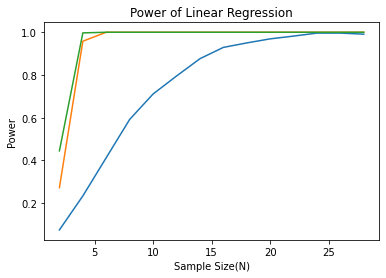

In [11]:
linregpower(N,A1,B1,sd,nrep)

You can see on this plot that as the slope increases, so does the power. When B was 1, the power approached 1 quickly as sample size increased, but .5 and .02 took larger sample sizes to approach 1 respectively.

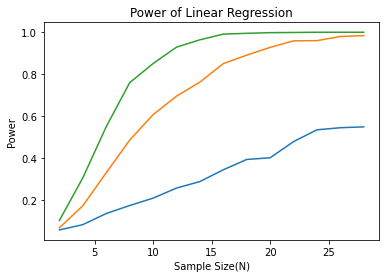

In [12]:
linregpower(N,A2,B2,sd,nrep)

This graph should show power being close to 0. if the calculation of power is number of times the null is rejected and the null we are checking is if b=0 which it is in this case, the null should rarely be rejected. Not sure why function works for non 0 values for slope but not accurately when slope is 0.